In [62]:
#pip install git+https://github.com/openai/whisper.git
#pip install transformers
#pip install Levenshtein
#pip install pip install requests beautifulsoup4

#pip install transformers
#pip install torch
#pip install sentencepiece
#pip install chardet

In [63]:
#CORRER EN BUCLE SOBRE UN GRUPO DE AUDIOS (ESTIMAR EL TIEMPO PROMEDIO POR MINUTO)
#TENER LOS DATOS DEL AUDIO COMO FECHA, ID_LLAMADA, PLAN_OFRECER 1 Y 2, ETC

#PASO 1 : DIVIDIR TODO EL TEXTO EN UNA LISTA POR '.' Y '?'
#PASO 2: APLICAR SIMILAR FRASES A CADA PARTE PARA ENCONTRAR TODAS LAS FASES (SALUDO, OFRECIMIENTO, VENTA, DESPEDIDA) Y GUARDAR SU POSICION
#REVISAR MUCHAS TRANSCRIPCIONES PARA PODER IDENTIFICAR FRASES USUALES USADAS POR LOS ASESORES EN LA LLMADADA

#PASO 3 : VOLVER A CONCATENAR TODA LA CONVERSACION POR PARTES (IDENTIFICADAS: SALUDO, ETC)
#PASO 4 : ENCONTRAR LA MANERA DE IDENTIFICAR LAS PARTES DEL ASESOR Y DEL CLIENTE 

#PASO 5 : APLICAR ANALISIS DE SENTIMIENTO EN LA RESPUESTA DEL OFRECIMIENTO Y DE LA CONFIRMACION DE LA VENTA
#PASO 6 : ALMACENAR LA CONVERSACION Y LOS DATOS IDENTIFICADOS EN TABLAS EN ORACLE(DATOS DE LA BASE QUE CORRESPONDE AL AUDIO Y DATOS ENCONTRADOS EN LA TRANSCRIPCION)

"""
Resúmenes de la conversación en X palabras.
Sentimiento predominante de la llamada.
Palabras más repetidas.
Frases incómodas/lisuras.
Validación de lectura de determinado speech.
Ofrecimiento de descuentos o bonos. El no ofrecimiento cuando la línea no aplique.
Ofrecimiento de determinado plan tarifario y/o servicio específico (ejemplo: protección móvil, seguro de equipos, protección contra robos y daños de equipo, prima de S/X).
Mención a un precio o cargo fijo específico.
Descubrir si el cliente mencionó que no cuenta líneas en otro operador (para campañas de líneas adicionales). En su defecto, identificar si cuenta con hijos (si el speech indica hacer esa pregunta).
Otros como alertas de port out, migración a prepago o reducción de plan tarifario (downgrade), motivo por el cual el cliente no quiso aceptar la oferta."""


'\nResúmenes de la conversación en X palabras.\nSentimiento predominante de la llamada.\nPalabras más repetidas.\nFrases incómodas/lisuras.\nValidación de lectura de determinado speech.\nOfrecimiento de descuentos o bonos. El no ofrecimiento cuando la línea no aplique.\nOfrecimiento de determinado plan tarifario y/o servicio específico (ejemplo: protección móvil, seguro de equipos, protección contra robos y daños de equipo, prima de S/X).\nMención a un precio o cargo fijo específico.\nDescubrir si el cliente mencionó que no cuenta líneas en otro operador (para campañas de líneas adicionales). En su defecto, identificar si cuenta con hijos (si el speech indica hacer esa pregunta).\nOtros como alertas de port out, migración a prepago o reducción de plan tarifario (downgrade), motivo por el cual el cliente no quiso aceptar la oferta.'

Palabras o frases más repetidas
Sentimiento general de la conversación
Intención de portar a otro operador, darse de baja o pasarse a prepago
Cuando el cliente renueva equipo por teléfono o whatsapp ¿le ofrecimos protección móvil?
Para los clientes que ya renovaron, los llamamos y ofrecemos seguro de equipo (protección móvil) ¿el vendedor usó las frases comerciales correctas (argumentos), levantó las objeciones que el cliente indicó, etc?
Indicar el motivo por el cual el cliente no quiere comprar o suscribirse o activar algún beneficio
En las migraciones de prepago a Postpago ¿se le indicó que va a tener que pagar un recibo mensual?
¿Se ofreció un descuento durante la venta de incremento de plan (upgrade)?
¿Se ofreció un bono durante la venta de incremento de plan?
¿Se ofreció un bono durante la venta de migración de prepago a Postpago?
En la venta de líneas adicionales ¿el cliente indicó si tiene alguna línea en otro operador? ¿el cliente indicó si tiene algún familiar o amigo para venderle una línea más?
En la venta de líneas adicionales, donde no aplica descuento alguno ¿el vendedor ofreció un descuento cuando no debía hacerlo?
En las campañas de contención de downgrade ¿el vendedor indicó al cliente lo que incluye su plan? ¿preguntó por qué motivo solicitó cambiarse a un plan de menor cargo fijo?
Para la venta de plan Netflix, ¿el vendedor indicó los beneficios de dicho plan (ejemplo: 4 dispositivos en alta definición, series exclusivas, entre otros)?.


-------------------------------------------
migra: si le habla del pago

en NV: PQ, SI LE HABLA DEL PROM REC, DE CUANTAS VECES RECARGÓ, "YO NO RECARGO, COSAS ASI"



In [74]:
######################################## INICIALIZACION ######################################
# audio a texto pyhton 64 bits
from ANALISIS_AUDIO import ANALISIS_AUDIO
import pandas as pd

credenciales_df = pd.read_excel('C:/Users/mathi/Downloads/transcribe/CREDENCIALES.xlsx', sheet_name='CREDENCIALES')
file_server = credenciales_df['FILESERVER'][0]
user = credenciales_df['CODIGO'][0]
password = credenciales_df['PASS'][0]

# D:/Edwin/LLAMADAS_CALL/transcripcion reno 
# post venta NO VENTA
# D:/Edwin/LLAMADAS_CALL/AUDIOS RENO POST VENTA, NO VENTA
txt_folder = "C:/Users/mathi/Downloads/transcribe/RETENCION_TEXTO"
audio_folder = "C:/Users/mathi/Downloads/transcribe/RETENCION_AUDIO"

transcripcion = ANALISIS_AUDIO(user, password)

# QUE LAS RUTAS EN VEZ DE TENER EL BACKSLASH TENGAN SLASH NOMAS


In [75]:

 
#Frases Alegres (más de 500 caracteres)
FA1 ="Hoy es un día maravilloso para recordar que la vida está llena de colores brillantes y oportunidades sin fin, donde cada sonrisa es un pincelazo en el lienzo de nuestras experiencias, y cada risa una melodía que se suma a la sinfonía de la alegría; es un tiempo para abrazar cada momento con gratitud, saboreando las pequeñas alegrías como si fueran grandes triunfos, y esparcir positividad como confeti en el aire de un festival inolvidable."
FA2 ="En este momento de pura felicidad, siento que el mundo es un escenario iluminado por luces de esperanza, donde cada paso es un baile de triunfo, cada palabra una canción de alegría, y cada encuentro una oportunidad para compartir amor y risas; es como si cada brisa trajera consigo aromas de nuevas posibilidades y cada amanecer revelara un horizonte lleno de sueños por alcanzar, en una aventura sin fin de descubrimiento y maravilla."
FA3 ="Imagina un lugar donde cada segundo vibra con la energía del entusiasmo, donde los corazones laten al unísono con la emoción de vivir plenamente, y donde cada mirada refleja una historia de superación y felicidad; en este mundo, las estrellas brillan con los deseos cumplidos, los arcoíris son puentes hacia metas logradas, y cada amistad es un tesoro más valioso que el oro, creando un mosaico de momentos inolvidables y experiencias llenas de luz y color."

#Frases Tristes (más de 500 caracteres)
FT1="En la profundidad de esta tristeza, el mundo parece un lugar sombrío, donde cada paso se siente pesado como si lleváramos el peso del universo en nuestros hombros, y cada suspiro es un recordatorio de sueños rotos y esperanzas desvanecidas; es un camino solitario, donde las lágrimas son compañeras silenciosas y los recuerdos se convierten en fantasmas que acechan en las sombras, dejando un vacío que parece imposible de llenar."
FT2="Hoy, el cielo llora conmigo, compartiendo lágrimas en un aguacero de dolor y melancolía, donde cada gota es un eco de lo que fue y lo que pudo haber sido, un reflejo de promesas incumplidas y palabras no dichas; es un océano de tristeza en el que me encuentro navegando sin rumbo, buscando una orilla de consuelo en un mar de desolación, donde incluso las estrellas parecen haber perdido su brillo."
FT3="En este silencio ensordecedor, la soledad se siente como un abrazo frío y vacío, donde cada pensamiento es un susurro de añoranza por tiempos mejores y amores perdidos; las calles están desiertas, como si el mundo entero compartiera mi dolor, y cada rincón guarda ecos de risas y momentos felices que ahora parecen tan lejanos, como estrellas extintas cuya luz aún no ha desaparecido del todo."


#Frases Molestas (más de 500 caracteres)
FM1 ="Estoy absolutamente harto de esta situación, es como si cada día fuera una prueba de paciencia, donde cada obstáculo es más frustrante que el anterior, y parece que nadie entiende o se preocupa por lo que estoy pasando; es como gritar en un vacío, donde mis palabras rebotan sin sentido, y cada esfuerzo parece en vano, en un ciclo interminable de desilusión y desgano."
FM2 ="¿Realmente es tan difícil hacer las cosas bien? Parece que cada vez que intento avanzar, alguien o algo se interpone con su incompetencia o su indiferencia, creando un laberinto de problemas y contratiempos que me hacen querer gritar de frustración; es un rompecabezas sin solución, donde cada pieza que coloco parece desencadenar un nuevo caos, en un juego sin fin de errores y malentendidos."
FM3 ="Hoy, mi paciencia ha llegado a su límite, es como si cada error ajeno fuera una afrenta personal, y cada descuido una burla a mi esfuerzo"



#transcripcion.resumir_texto("Hola como estas bien y tu")
#transcripcion.detectar_toxicidad("Hola como estas bien y tu")[0]['score']
transcripcion.mostrar_analisis_sent(FM2 + " " + FM2)
#transcripcion.detectar_toxicidad("hkjkjhkjhjkhjkhjkhkj") 

[{'label': 'NEGATIVE', 'score': 0.9996110796928406}]

In [66]:
#################################### CONVERSACIONES EN WHATSAPP ################################################################

frases_buscar= ["no deseo", "no quiero", "no gracias", "no jodan", "no molesten", 
                   "nunca","noooooo","estafadores",
         "equipo", 
         "no requiero", "nono", 
         "en otro momento"  ]

transcripcion.WSP_UPG_analizar_conversacion(frases_buscar)

DatabaseError: DPI-1047: Cannot locate a 64-bit Oracle Client library: "failed to get message for Windows Error 126". See https://cx-oracle.readthedocs.io/en/latest/user_guide/installation.html for help

In [76]:
#################################### LLAMADAS CALL  ################################################################

transcripcion.transcribir_audios_masivo(audio_folder, txt_folder)


FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado

In [ ]:
transcripcion.llamada_call_procesar_transcripcion (txt_folder)  ##sepaar por frasesllamada_call_procesar_transcripcion

In [ ]:
#################################### LLAMADAS CALL  ################################################################

frases= ["seguro", "prima mensual", "seguro de equipos", "beneficio","prima", "prima mensual", "protección móvil", "pago mensual", "robo", "renovación",
"daño físico", "30 días", "deducible", "no deseo", "no quiero", "no gracias", "no jodan", "no molesten", "me voy a cambiar","nunca","noooooo","estafadores",
         "equipo", "movistar", "entel", "bitel", "claro", "no deseo", "no requiero", "nono", "en otro momento", "todavía", "muy caro", "telefono", "costo", "economía", "pagar"
         ]

transcripcion.llamada_call_procesar_conversacion_oracle(txt_folder, frases, "UPGRADE",4)


#transcripcion.mostrar_analisis_sent(text)
#print(transcripcion.detectar_toxicidad(texto))

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
#gpt2-medium
#gpt2-large
#gpt2-xl
# Carga el tokenizador y el modelo
tokenizer = GPT2Tokenizer.from_pretrained("gpt2-xl")
model = GPT2LMHeadModel.from_pretrained("gpt2-xl")
# Texto de ejemplo para generar texto continuado
input_text = """HOLA"""
input_text= transcripcion.traducir_a_ingles(input_text)
inputs = tokenizer.encode(input_text, return_tensors="pt")
#output = model.generate(inputs, max_length=50, num_return_sequences=2)
output = model.generate(inputs, max_length=61, num_beams=5, num_return_sequences=5)
output_text =tokenizer.decode(output[0], skip_special_tokens=True)
output_text = transcripcion.traducir_a_espanol(output_text)
print(output_text)

In [ ]:
#CONTINUARÁ....

In [ ]:
import requests
from bs4 import BeautifulSoup
import os

def descargar_mp3(url, carpeta_destino):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    enlaces = soup.find_all('a')

    mp3_urls = [url + enlace['href'] for enlace in enlaces if enlace['href'].endswith('.mp3')]

    if not os.path.exists(carpeta_destino):
        os.makedirs(carpeta_destino)

    for mp3_url in mp3_urls:
        nombre_archivo = mp3_url.split('/')[-1]
        ruta_completa = os.path.join(carpeta_destino, nombre_archivo)
        respuesta = requests.get(mp3_url)
        with open(ruta_completa, 'wb') as archivo:
            archivo.write(respuesta.content)
        print(f"Descargado: {nombre_archivo}")

url = 'http://ejemplo.com/pagina-con-mp3'
carpeta_destino = 'C:/ruta/a/tu/carpeta'

descargar_mp3(url, carpeta_destino)

In [ ]:
import warnings
from datetime import datetime
import os
import whisper
from transformers import MarianMTModel, MarianTokenizer, T5ForConditionalGeneration, T5Tokenizer
from transformers import BartForConditionalGeneration, BartTokenizer
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer  # 64 bits
import nltk
from nltk.tokenize import PunktSentenceTokenizer
import csv
from collections import Counter
import chardet
import Levenshtein as lev
import string
from nltk.corpus import stopwords
class ANALISIS_AUDIO:
      
    def __init__(self ):
        warnings.filterwarnings('ignore')

        self.lisuras =[
    "carajo", "mierda", "joder", "puta", "cojudo", "huevón", "chingar",
    "pendejo", "cabrón", "gil", "conchatumadre", "marica", "poto", "cagar",
    "pinga", "maldito", "idiota", "imbécil", "estúpido", "tarado", "malparido",
    "conchesumadre", "putamadre", "reputamadre", "hijueputa", "mamahuevo",
    "cagada", "chingada", "jodida", "putada"
    ]
 
    def transcribir_audio(self,audio_file_path, language="es"):
        model = whisper.load_model("medium")
        result = model.transcribe(audio_file_path, language=language)
        return result["text"]
 
    def transcribir_audios_masivo(self,audio_folder, txt_folder):
        for filename in os.listdir(audio_folder):
            #if filename.endswith(".mp3") or filename.endswith(".wav"):
            audio_file_path = os.path.join(audio_folder, filename)
            transcription = self.transcribir_audio(audio_file_path)
            text_filename = os.path.splitext(filename)[0] + ".txt"
            text_file_path = os.path.join(txt_folder, text_filename)
            with open(text_file_path, "w", encoding="utf-8") as text_file:
                print('transcripcion  : ' + transcription)
                text_file.write(transcription)

    
   
    def traducir_a_ingles(self,texto):
        tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-es-en")
        model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-es-en")
        encoded = tokenizer.encode(texto, return_tensors="pt", max_length=512, truncation=True)
        translated = model.generate(encoded)
        return tokenizer.decode(translated[0], skip_special_tokens=True)
 
    def resumir_con_t5(self,texto):
        modelo = "t5-large"  # O "t5-base"
        tokenizer = T5Tokenizer.from_pretrained(modelo)
        model = T5ForConditionalGeneration.from_pretrained(modelo)
        inputs = tokenizer.encode("summarize: " + texto, return_tensors="pt", max_length=512, truncation=True)
        summary_ids = model.generate(inputs, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
        return tokenizer.decode(summary_ids[0], skip_special_tokens=True)
 
    def traducir_a_espanol(self,texto):
        tokenizer = MarianTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-es")
        model = MarianMTModel.from_pretrained("Helsinki-NLP/opus-mt-en-es")
        encoded = tokenizer.encode(texto, return_tensors="pt", max_length=512, truncation=True)
        translated = model.generate(encoded)
        return tokenizer.decode(translated[0], skip_special_tokens=True)
    
    def resumir_texto(self, texto_original, tipo=0):
        resumen_final=""
        if tipo==0:
            texto_en_ingles = self.traducir_a_ingles(texto_original)
            resumen_en_ingles = self.resumir_con_t5(texto_en_ingles)
            resumen_final = self.traducir_a_espanol(resumen_en_ingles)
        else :
            texto_en_ingles = self.traducir_a_ingles(texto_original)
            resumen_en_ingles = self.resumir_con_bart(texto_en_ingles)
            resumen_final = self.traducir_a_espanol(resumen_en_ingles)
        return resumen_final
    
    
    def resumir_con_bart(texto):
        tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
        model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
 
        inputs = tokenizer([texto], max_length=1024, return_tensors='pt')
 
        summary_ids = model.generate(
            inputs['input_ids'],
            num_beams=10,  # Aumentar el número de beams
            max_length=100,  # Extender la longitud máxima
            min_length=100,  # Establecer una longitud mínima significativa
            length_penalty=2.5,  # Incrementar la penalización por longitud
            no_repeat_ngram_size=4,  # Evitar la repetición de n-gramas
            early_stopping=False  # Desactivar el early stopping
            )
 
        resumen_en_ingles = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
 
        return resumen_en_ingles
 
    
    def analyze_sentiment_es(self,texto):
   
        model_name = "finiteautomata/beto-sentiment-analysis"  
        model = AutoModelForSequenceClassification.from_pretrained(model_name)
        tokenizer = AutoTokenizer.from_pretrained(model_name)

        sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

        results = sentiment_pipeline(texto)

        return results
    

     
    def cargar_modelo_analisis_sentimientos_distilbert(self):
        sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
        return sentiment_pipeline
 
    def analizar_sentimiento_distilbert(self,texto, sentiment_pipeline):
        resultados = sentiment_pipeline(texto)
        return resultados
 
    def mostrar_analisis_sent(self, texto):
        sentiment_pipeline_distilbert = self.cargar_modelo_analisis_sentimientos_distilbert()
        resultados = self.analizar_sentimiento_distilbert(self.traducir_a_ingles(texto), sentiment_pipeline_distilbert)
        return resultados
 
    def detectar_toxicidad(self,texto):
        modelo = "unitary/toxic-bert"
        tokenizer = AutoTokenizer.from_pretrained(modelo)
        model = AutoModelForSequenceClassification.from_pretrained(modelo)
        toxicity_pipeline = pipeline("text-classification", model=model, tokenizer=tokenizer)
        resultados = toxicity_pipeline(self.traducir_a_ingles(texto))
        return resultados


transcripcion =ANALISIS_AUDIO()

#transcripcion.resumir_texto("Hola como estas bien y tu")
transcripcion.mostrar_analisis_sent("estoy mal")
#transcripcion.detectar_toxicidad("estoy mal")

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 

def mostrar_evolucion(df): 
    df_responde=df

    df_responde.columns = [col.strip() for col in df_responde.columns]
    df_responde['AÑO'] = df_responde['AÑO'].astype(int)
    df_responde['MES'] = df_responde['MES'].astype(int)
    df_responde['DIA'] = df_responde['DIA'].astype(int)
 
    df_responde['FECHA'] = pd.to_datetime(
    df_responde['AÑO'].astype(str) + '-' + 
    df_responde['MES'].astype(str).str.zfill(2) + '-' + 
    df_responde['DIA'].astype(str).str.zfill(2)
    )
 
    df_responde['UPLINK'] = pd.to_numeric(df_responde['UPLINK'], errors='coerce')
 
    grouped_data_latest = df_responde.groupby('FECHA')[['UPLINK', 'DOWNLINK']].mean()
 
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8), sharex=True)
 
    sns.lineplot(ax=axes[0], x=grouped_data_latest.index, y=grouped_data_latest['UPLINK'])
    axes[0].set_title('Uplink en el tiempo')
    axes[0].set_ylabel('Uplink Promedio')
    axes[0].set_xlabel('')
 
    sns.lineplot(ax=axes[1], x=grouped_data_latest.index, y=grouped_data_latest['DOWNLINK'])
    axes[1].set_title('Downlink en el tiempo')  
    axes[1].set_ylabel('Downlink Promedio')
    axes[1].set_xlabel('FECHA')
 
    plt.tight_layout()
    plt.show()

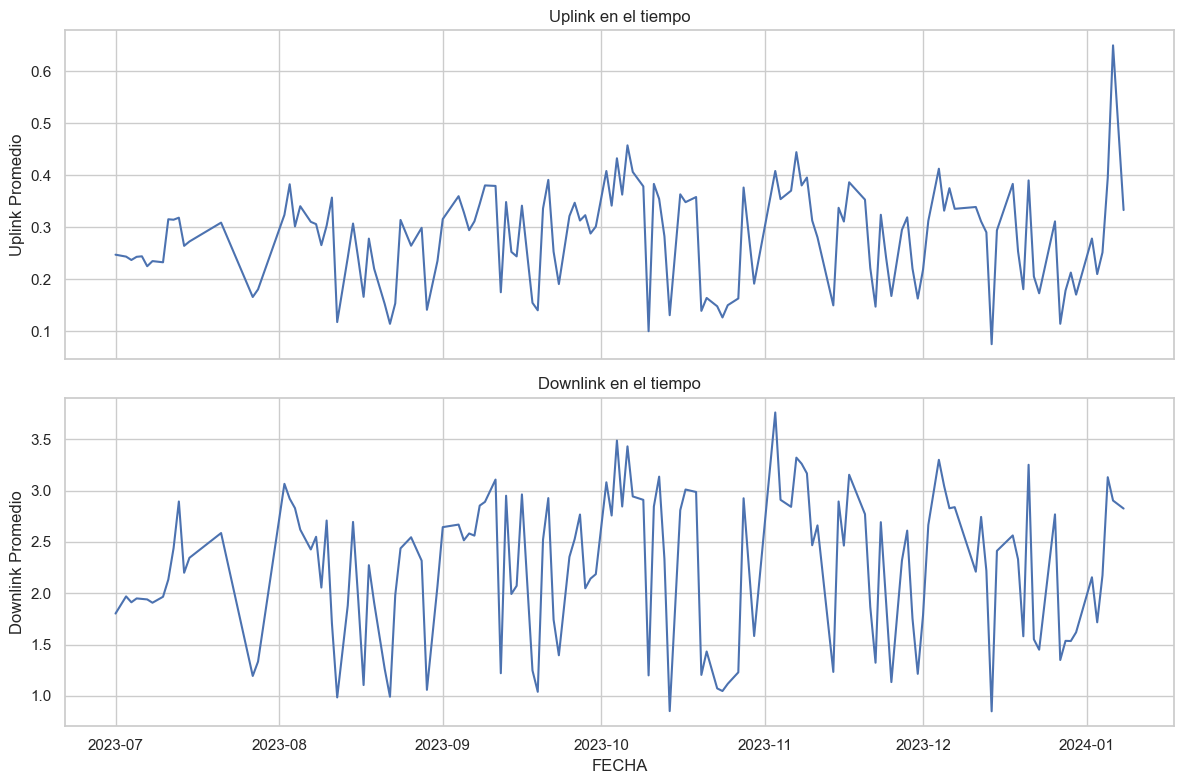

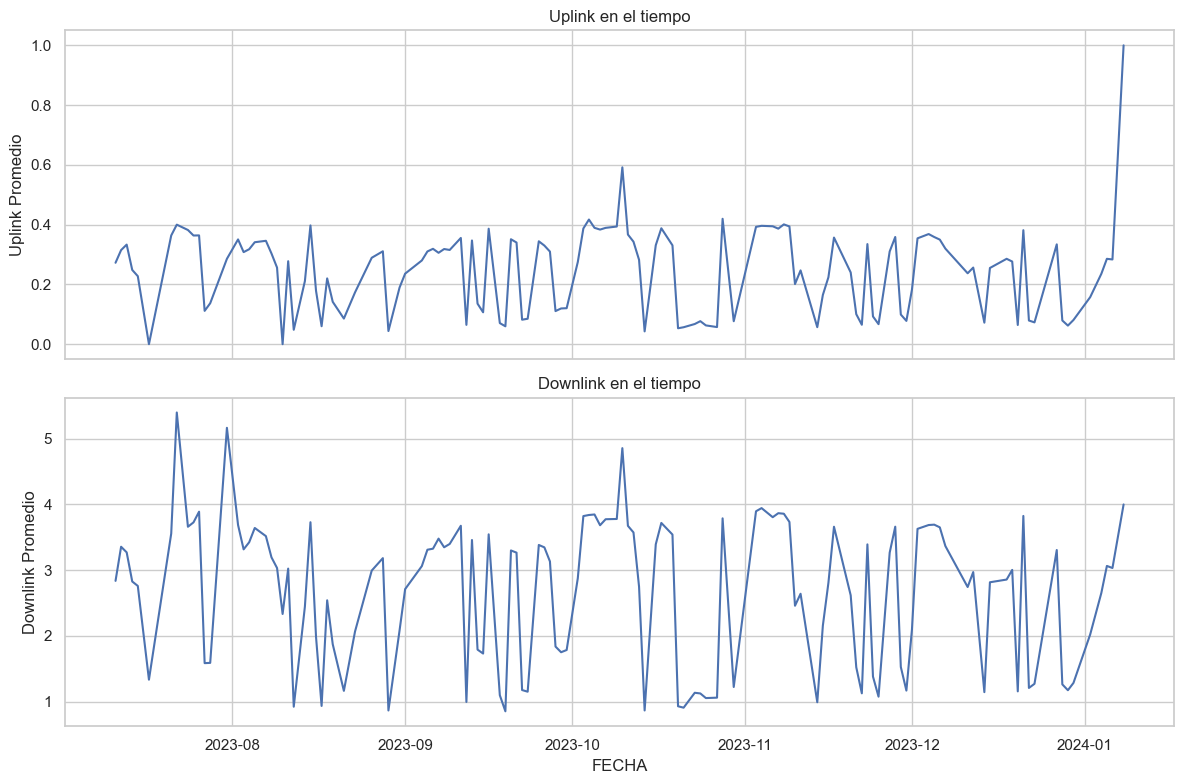

In [ ]:

file_path = 'D:/Edwin/LLAMADAS_CALL/WSP_RESPONDE_COMP.csv'  # Replace with your file path
df1 = pd.read_csv(file_path, encoding='latin1')

file_path_2 = 'D:/Edwin/LLAMADAS_CALL/WSP_NO_RESPONDE_COMP.csv'  # Replace with your file path
df2 = pd.read_csv(file_path_2, encoding='latin1')

mostrar_evolucion(df1)
mostrar_evolucion(df2)
